# Предобработка

In [4]:
import pandas as pd

In [131]:
demand = pd.read_csv("Hourly Supply_Demand Data - Demand.csv")
supply = pd.read_csv("Hourly Supply_Demand Data - Supply.csv")

In [132]:
demand

,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique)
0,2016-12-18 23,9,32,78
1,2016-12-18 22,29,64,69
2,2016-12-18 21,5,39,89
3,2016-12-18 20,13,48,79
4,2016-12-18 19,12,77,87
...,...,...,...,...
834,2016-11-14 04,4,4,50
835,2016-11-14 03,1,2,67
836,2016-11-14 02,3,6,67
837,2016-11-14 01,8,8,50


In [137]:
supply

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides
0,2016-12-18 23,52,18,6,11,11,0.3,0.67,12.0
1,2016-12-18 22,59,20,11,9,12,0.3,1.40,28.0
2,2016-12-18 21,72,25,7,18,15,0.3,0.64,16.0
3,2016-12-18 20,86,29,7,23,15,0.3,0.52,15.0
4,2016-12-18 19,82,31,14,17,19,0.4,1.16,36.0
...,...,...,...,...,...,...,...,...,...
835,2016-11-14 04,15,6,0,6,6,0.4,0.00,NaN
836,2016-11-14 03,18,7,0,7,7,0.4,0.00,NaN
837,2016-11-14 02,21,7,0,7,9,0.3,0.14,1.0
838,2016-11-14 01,29,9,1,8,11,0.3,0.22,2.0


In [133]:
demand['Weekday'] = pd.to_datetime(demand['Date'].str.slice(stop=10)).dt.dayofweek.astype(str)
demand['Hour'] = demand['Date'].str.slice(start=11)
demand['Date_'] = demand[['Weekday', 'Hour']].agg(' '.join, axis=1)
del demand['Weekday']
del demand['Hour']
demand

,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique),Date_
0,2016-12-18 23,9,32,78,6 23
1,2016-12-18 22,29,64,69,6 22
2,2016-12-18 21,5,39,89,6 21
3,2016-12-18 20,13,48,79,6 20
4,2016-12-18 19,12,77,87,6 19
...,...,...,...,...,...
834,2016-11-14 04,4,4,50,0 04
835,2016-11-14 03,1,2,67,0 03
836,2016-11-14 02,3,6,67,0 02
837,2016-11-14 01,8,8,50,0 01


In [112]:
demand = demand.groupby('Date_').mean()
demand

,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique)
Date_,,,
0 00,8.6,24.4,75.8
0 01,5.6,12.4,69.2
0 02,3.2,7.4,69.6
0 03,3.0,3.2,56.6
0 04,4.6,2.6,35.4
...,...,...,...
6 19,9.8,52.6,86.0
6 20,6.6,49.0,88.6
6 21,6.2,39.4,87.6


In [66]:
supply

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides
0,2016-12-18 23,52,18,6,11,11,0.3,0.67,12.0
1,2016-12-18 22,59,20,11,9,12,0.3,1.40,28.0
2,2016-12-18 21,72,25,7,18,15,0.3,0.64,16.0
3,2016-12-18 20,86,29,7,23,15,0.3,0.52,15.0
4,2016-12-18 19,82,31,14,17,19,0.4,1.16,36.0
...,...,...,...,...,...,...,...,...,...
835,2016-11-14 04,15,6,0,6,6,0.4,0.00,NaN
836,2016-11-14 03,18,7,0,7,7,0.4,0.00,NaN
837,2016-11-14 02,21,7,0,7,9,0.3,0.14,1.0
838,2016-11-14 01,29,9,1,8,11,0.3,0.22,2.0


In [67]:
supply['Weekday'] = pd.to_datetime(supply['Date'].str.slice(stop=10)).dt.dayofweek.astype(str)
supply['Hour'] = supply['Date'].str.slice(start=11)
supply['Date_'] = supply[['Weekday', 'Hour']].agg(' '.join, axis=1)
del supply['Weekday']
del supply['Hour']
supply

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides,Date_
0,2016-12-18 23,52,18,6,11,11,0.3,0.67,12.0,6 23
1,2016-12-18 22,59,20,11,9,12,0.3,1.40,28.0,6 22
2,2016-12-18 21,72,25,7,18,15,0.3,0.64,16.0,6 21
3,2016-12-18 20,86,29,7,23,15,0.3,0.52,15.0,6 20
4,2016-12-18 19,82,31,14,17,19,0.4,1.16,36.0,6 19
...,...,...,...,...,...,...,...,...,...,...
835,2016-11-14 04,15,6,0,6,6,0.4,0.00,NaN,0 04
836,2016-11-14 03,18,7,0,7,7,0.4,0.00,NaN,0 03
837,2016-11-14 02,21,7,0,7,9,0.3,0.14,1.0,0 02
838,2016-11-14 01,29,9,1,8,11,0.3,0.22,2.0,0 01


In [68]:
supply = supply.groupby('Date_').mean()
supply

,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides
Date_,,,,,,,,
0 00,40.0,14.6,2.6,11.8,9.6,0.36,0.506,7.0
0 01,29.6,10.4,1.6,9.2,7.6,0.36,0.298,4.0
0 02,20.4,7.6,0.6,6.8,6.0,0.36,0.312,2.4
0 03,14.8,5.4,0.2,5.2,4.8,0.36,0.090,1.0
0 04,12.4,4.8,0.2,4.6,4.8,0.38,0.100,3.0
...,...,...,...,...,...,...,...,...
6 19,82.2,31.4,8.8,22.6,21.0,0.40,0.696,21.2
6 20,82.0,33.4,6.4,27.4,18.4,0.38,0.492,14.8
6 21,74.2,26.4,5.8,20.8,17.2,0.36,0.706,17.0


# 2 задание

In [427]:
demand = pd.read_csv("Hourly Supply_Demand Data - Demand.csv")
supply = pd.read_csv("Hourly Supply_Demand Data - Supply.csv")

In [428]:
demand

,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique)
0,2016-12-18 23,9,32,78
1,2016-12-18 22,29,64,69
2,2016-12-18 21,5,39,89
3,2016-12-18 20,13,48,79
4,2016-12-18 19,12,77,87
...,...,...,...,...
834,2016-11-14 04,4,4,50
835,2016-11-14 03,1,2,67
836,2016-11-14 02,3,6,67
837,2016-11-14 01,8,8,50


In [429]:
demand['Hour'] = demand['Date'].str.slice(start=11)
demand

,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique),Hour
0,2016-12-18 23,9,32,78,23
1,2016-12-18 22,29,64,69,22
2,2016-12-18 21,5,39,89,21
3,2016-12-18 20,13,48,79,20
4,2016-12-18 19,12,77,87,19
...,...,...,...,...,...
834,2016-11-14 04,4,4,50,04
835,2016-11-14 03,1,2,67,03
836,2016-11-14 02,3,6,67,02
837,2016-11-14 01,8,8,50,01


In [430]:
demand_hour = demand.groupby('Hour').mean()
demand_hour

,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique)
Hour,,,
00,8.714286,45.342857,84.942857
01,7.542857,30.228571,80.400000
02,8.257143,22.085714,76.171429
03,12.228571,18.400000,63.628571
04,13.028571,12.800000,53.428571
05,3.970588,7.617647,66.323529
06,4.200000,5.971429,58.914286
07,12.971429,15.285714,58.000000
08,25.514286,31.885714,59.885714


In [431]:
demand_hour['Active users'] = demand_hour['People saw 0 cars (unique)'] + demand_hour['People saw +1 cars (unique)']
demand_hour

,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique),Active users
Hour,,,,
00,8.714286,45.342857,84.942857,54.057143
01,7.542857,30.228571,80.400000,37.771429
02,8.257143,22.085714,76.171429,30.342857
03,12.228571,18.400000,63.628571,30.628571
04,13.028571,12.800000,53.428571,25.828571
05,3.970588,7.617647,66.323529,11.588235
06,4.200000,5.971429,58.914286,10.171429
07,12.971429,15.285714,58.000000,28.257143
08,25.514286,31.885714,59.885714,57.400000


In [432]:
supply

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides
0,2016-12-18 23,52,18,6,11,11,0.3,0.67,12.0
1,2016-12-18 22,59,20,11,9,12,0.3,1.40,28.0
2,2016-12-18 21,72,25,7,18,15,0.3,0.64,16.0
3,2016-12-18 20,86,29,7,23,15,0.3,0.52,15.0
4,2016-12-18 19,82,31,14,17,19,0.4,1.16,36.0
...,...,...,...,...,...,...,...,...,...
835,2016-11-14 04,15,6,0,6,6,0.4,0.00,NaN
836,2016-11-14 03,18,7,0,7,7,0.4,0.00,NaN
837,2016-11-14 02,21,7,0,7,9,0.3,0.14,1.0
838,2016-11-14 01,29,9,1,8,11,0.3,0.22,2.0


In [433]:
supply['Hour'] = supply['Date'].str.slice(start=11)
supply

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides,Hour
0,2016-12-18 23,52,18,6,11,11,0.3,0.67,12.0,23
1,2016-12-18 22,59,20,11,9,12,0.3,1.40,28.0,22
2,2016-12-18 21,72,25,7,18,15,0.3,0.64,16.0,21
3,2016-12-18 20,86,29,7,23,15,0.3,0.52,15.0,20
4,2016-12-18 19,82,31,14,17,19,0.4,1.16,36.0,19
...,...,...,...,...,...,...,...,...,...,...
835,2016-11-14 04,15,6,0,6,6,0.4,0.00,NaN,04
836,2016-11-14 03,18,7,0,7,7,0.4,0.00,NaN,03
837,2016-11-14 02,21,7,0,7,9,0.3,0.14,1.0,02
838,2016-11-14 01,29,9,1,8,11,0.3,0.22,2.0,01


In [434]:
supply_hour = supply.groupby('Hour').mean()
supply_hour

,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides
Hour,,,,,,,,
00,61.171429,24.657143,7.714286,16.971429,15.828571,0.402857,0.764286,19.685714
01,51.514286,20.428571,5.200000,15.257143,12.742857,0.388571,0.550571,13.264706
02,39.714286,15.857143,3.685714,12.200000,10.657143,0.388571,0.518857,10.125000
03,31.942857,12.742857,3.114286,9.514286,9.457143,0.388571,0.492857,10.035714
04,27.371429,10.314286,2.657143,7.657143,8.428571,0.368571,0.468000,10.000000
05,26.657143,9.742857,1.314286,8.257143,7.800000,0.365714,0.265429,4.391304
06,28.342857,9.028571,0.771429,8.314286,7.742857,0.308571,0.219143,2.129032
07,36.714286,12.085714,2.628571,9.485714,8.942857,0.322857,0.588000,7.212121
08,47.285714,17.314286,7.200000,10.228571,11.828571,0.354286,0.819429,14.685714


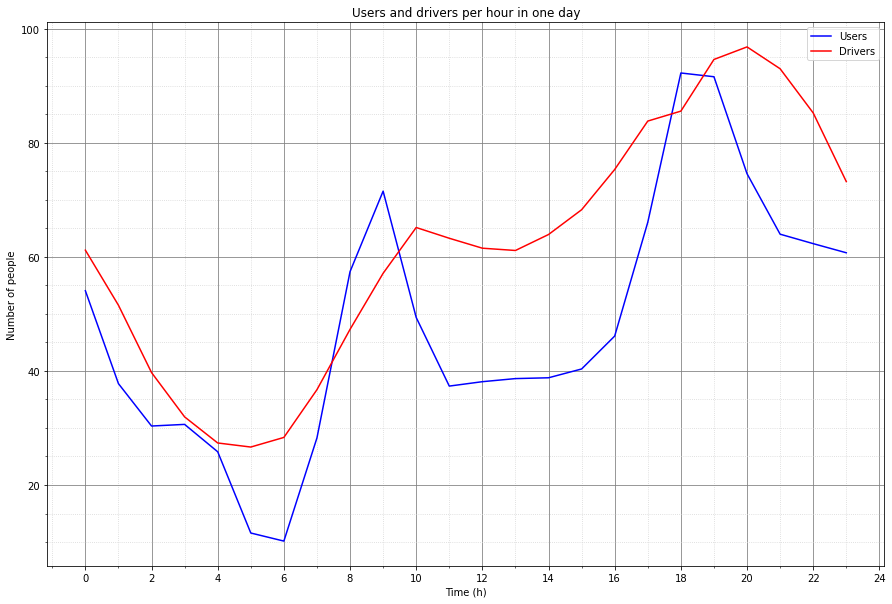

In [435]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
a = []
for i in range(0, 24):
    a.append(i)
    
    
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(10)

ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))
ax.grid(which='major', color = 'grey')
ax.grid(which='minor', color = 'lightgrey', linestyle = ':')
ax.set_xlabel('Time (h)')
ax.set_ylabel('Number of people')
ax.set_title('Users and drivers per hour in one day')

ax.plot(a, demand_hour['Active users'], label='Users', color='b')
ax.plot(a, supply_hour['Active drivers'], label = 'Drivers', color='r')
plt.legend()
plt.show()

In [436]:
fig.savefig("24hour1day.png")

# -----

In [437]:
demand = pd.read_csv("Hourly Supply_Demand Data - Demand.csv")
supply = pd.read_csv("Hourly Supply_Demand Data - Supply.csv")

In [438]:
demand['Active users'] = demand['People saw 0 cars (unique)'] + demand['People saw +1 cars (unique)']
demand['Weekday'] = pd.to_datetime(demand['Date'].str.slice(stop=10)).dt.dayofweek.astype(str)
demand['Hour'] = demand['Date'].str.slice(start=11)
demand['Date_'] = demand[['Weekday', 'Hour']].agg(' '.join, axis=1)
del demand['Weekday']
del demand['Hour']
demand

,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique),Active users,Date_
0,2016-12-18 23,9,32,78,41,6 23
1,2016-12-18 22,29,64,69,93,6 22
2,2016-12-18 21,5,39,89,44,6 21
3,2016-12-18 20,13,48,79,61,6 20
4,2016-12-18 19,12,77,87,89,6 19
...,...,...,...,...,...,...
834,2016-11-14 04,4,4,50,8,0 04
835,2016-11-14 03,1,2,67,3,0 03
836,2016-11-14 02,3,6,67,9,0 02
837,2016-11-14 01,8,8,50,16,0 01


In [439]:
demand = demand.groupby('Date_').mean()
demand

,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique),Active users
Date_,,,,
0 00,8.6,24.4,75.8,33.0
0 01,5.6,12.4,69.2,18.0
0 02,3.2,7.4,69.6,10.6
0 03,3.0,3.2,56.6,6.2
0 04,4.6,2.6,35.4,7.2
...,...,...,...,...
6 19,9.8,52.6,86.0,62.4
6 20,6.6,49.0,88.6,55.6
6 21,6.2,39.4,87.6,45.6


In [440]:
supply['Weekday'] = pd.to_datetime(supply['Date'].str.slice(stop=10)).dt.dayofweek.astype(str)
supply['Hour'] = supply['Date'].str.slice(start=11)
supply['Date_'] = supply[['Weekday', 'Hour']].agg(' '.join, axis=1)
del supply['Weekday']
del supply['Hour']
supply

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides,Date_
0,2016-12-18 23,52,18,6,11,11,0.3,0.67,12.0,6 23
1,2016-12-18 22,59,20,11,9,12,0.3,1.40,28.0,6 22
2,2016-12-18 21,72,25,7,18,15,0.3,0.64,16.0,6 21
3,2016-12-18 20,86,29,7,23,15,0.3,0.52,15.0,6 20
4,2016-12-18 19,82,31,14,17,19,0.4,1.16,36.0,6 19
...,...,...,...,...,...,...,...,...,...,...
835,2016-11-14 04,15,6,0,6,6,0.4,0.00,NaN,0 04
836,2016-11-14 03,18,7,0,7,7,0.4,0.00,NaN,0 03
837,2016-11-14 02,21,7,0,7,9,0.3,0.14,1.0,0 02
838,2016-11-14 01,29,9,1,8,11,0.3,0.22,2.0,0 01


In [441]:
supply = supply.groupby('Date_').mean()
supply

,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides
Date_,,,,,,,,
0 00,40.0,14.6,2.6,11.8,9.6,0.36,0.506,7.0
0 01,29.6,10.4,1.6,9.2,7.6,0.36,0.298,4.0
0 02,20.4,7.6,0.6,6.8,6.0,0.36,0.312,2.4
0 03,14.8,5.4,0.2,5.2,4.8,0.36,0.090,1.0
0 04,12.4,4.8,0.2,4.6,4.8,0.38,0.100,3.0
...,...,...,...,...,...,...,...,...
6 19,82.2,31.4,8.8,22.6,21.0,0.40,0.696,21.2
6 20,82.0,33.4,6.4,27.4,18.4,0.38,0.492,14.8
6 21,74.2,26.4,5.8,20.8,17.2,0.36,0.706,17.0


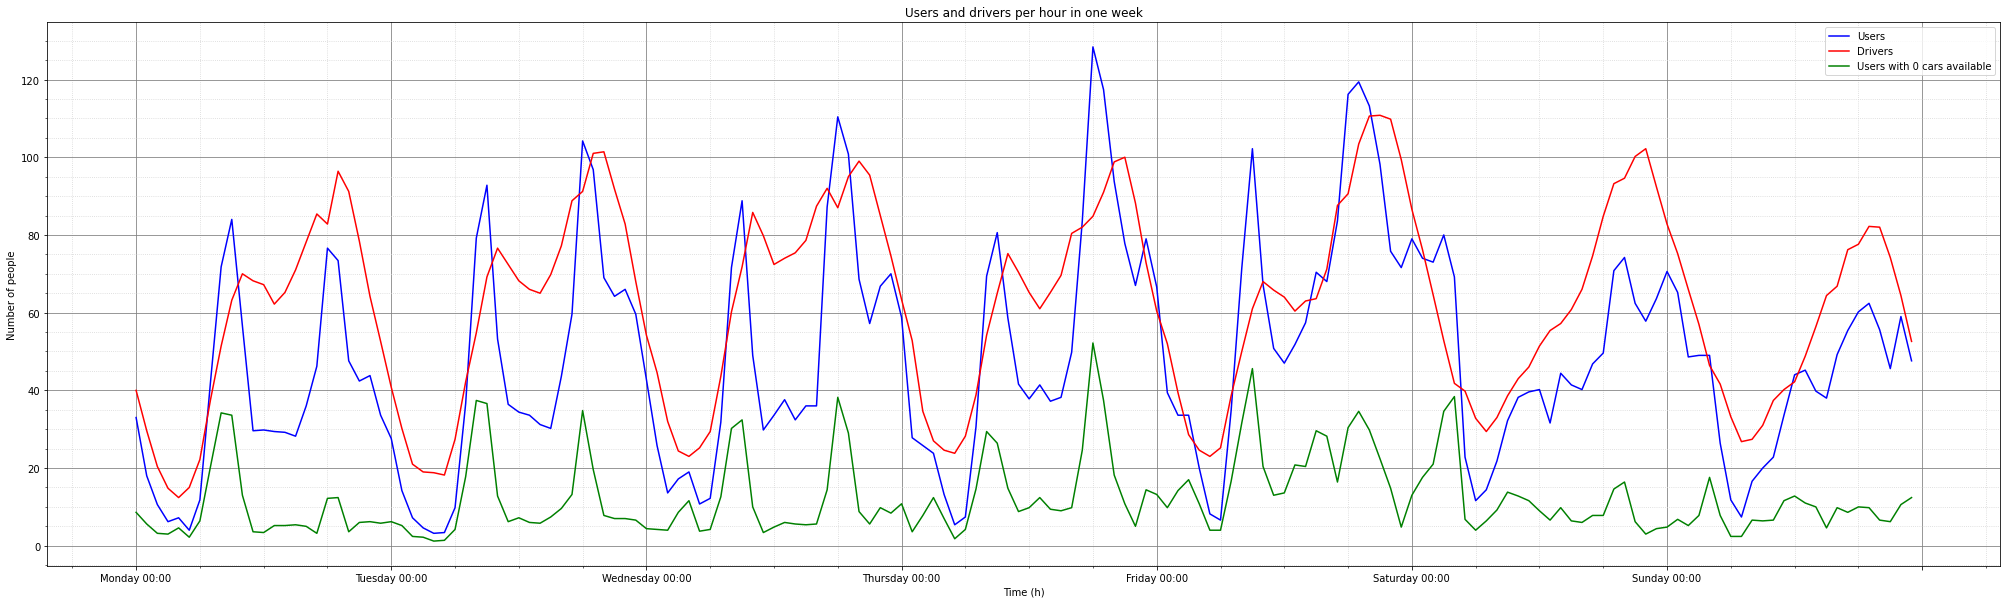

In [442]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
a = []
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
for i in range(0, 7):
    for j in range(0, 24):
        if j < 10:
            a.append(days[i] + " 0" + str(j) + ":00")
        else:
            a.append(days[i] + " " + str(j) + ":00")



fig, ax = plt.subplots()
fig.set_figwidth(35)
fig.set_figheight(10)

ax.xaxis.set_major_locator(ticker.MultipleLocator(24))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(6))
ax.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))
ax.grid(which='major', color = 'grey')
ax.grid(which='minor', color = 'lightgrey', linestyle = ':')
ax.set_xlabel('Time (h)')
ax.set_ylabel('Number of people')
ax.set_title('Users and drivers per hour in one week')

ax.plot(a, demand['Active users'], label='Users', color='b')
ax.plot(a, supply['Active drivers'], label = 'Drivers', color='r')
ax.plot(a, demand['People saw 0 cars (unique)'], label = 'Users with 0 cars available', color='g')
plt.legend()
plt.show()

In [443]:
fig.savefig("24hour7days.png")

# 1 задание

In [470]:
active = pd.DataFrame(columns=['Users', 'Drivers'])
active['Users'] = demand['People saw 0 cars (unique)']
active['Drivers'] = supply['Active drivers']

#demand0 = demand.sort_values(by=['People saw 0 cars (unique)'], ascending=False)
#print(demand0.iloc[:36, :1])
active['U/D'] = active['Users'] / active['Drivers']
#active = active.sort_values(by=['U/D'], ascending=True)
#print(active.iloc[:36])

active = active.sort_values(by=['U/D'], ascending=False)

#demand0.iloc[:36, :2].to_csv('sample_ansolute.csv', index=True) 
del active['Users']
del active['Drivers']
active = active.reset_index()
active.iloc[:36].to_csv('sample_relative.csv', index=True) 
active.iloc[:36]

,Date_,U/D
0,5 04,0.918660
1,4 09,0.747541
2,1 08,0.682482
3,0 08,0.665370
4,5 03,0.655303
5,4 08,0.632000
6,3 18,0.615566
7,4 03,0.594406
8,0 07,0.542553
9,3 08,0.542435


In [472]:
demand0 = demand.sort_values(by=['People saw 0 cars (unique)'], ascending=False)
#print(demand0.iloc[:36, :1])
demand0 = demand0.reset_index()
demand0.iloc[:36, :2].to_csv('sample_absolute.csv', index=True) 
demand0.iloc[:36, :2]

,Date_,People saw 0 cars (unique)
0,3 18,52.2
1,4 09,45.6
2,5 04,38.4
3,2 18,38.2
4,1 08,37.4
5,3 19,37.4
6,1 09,36.6
7,1 18,34.8
8,5 03,34.6
9,4 19,34.6


# 3 задание

In [446]:
demand0 = demand0.sort_values(by=['Date_'], ascending=True)
demand0

,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique),Share_0,Share_1
Date_,,,,,
0 00,8.6,24.4,75.8,0.260606,0.739394
0 01,5.6,12.4,69.2,0.311111,0.688889
0 02,3.2,7.4,69.6,0.301887,0.698113
0 03,3.0,3.2,56.6,0.483871,0.516129
0 04,4.6,2.6,35.4,0.638889,0.361111
...,...,...,...,...,...
6 19,9.8,52.6,86.0,0.157051,0.842949
6 20,6.6,49.0,88.6,0.118705,0.881295
6 21,6.2,39.4,87.6,0.135965,0.864035


In [447]:
Users_M = []
for i in range(7):
    temp = []
    Users_M.append(temp)
    for j in range(24):
        Users_M[i].append(demand0.iloc[i*24 + j, 0])
Users_M

[[8.6,
  5.6,
  3.2,
  3.0,
  4.6,
  2.2,
  6.4,
  20.4,
  34.2,
  33.6,
  13.0,
  3.6,
  3.4,
  5.2,
  5.2,
  5.4,
  5.0,
  3.2,
  12.2,
  12.4,
  3.6,
  6.0,
  6.2,
  5.8],
 [6.2,
  5.2,
  2.4,
  2.2,
  1.2,
  1.4,
  4.2,
  17.8,
  37.4,
  36.6,
  12.8,
  6.2,
  7.2,
  6.0,
  5.8,
  7.4,
  9.6,
  13.2,
  34.8,
  19.6,
  7.8,
  7.0,
  7.0,
  6.6],
 [4.4,
  4.2,
  4.0,
  8.6,
  11.6,
  3.75,
  4.2,
  12.6,
  30.2,
  32.4,
  10.0,
  3.4,
  4.8,
  6.0,
  5.6,
  5.4,
  5.6,
  14.4,
  38.2,
  29.0,
  8.8,
  5.6,
  9.8,
  8.4],
 [10.8,
  3.6,
  7.8,
  12.4,
  7.0,
  1.8,
  4.2,
  14.6,
  29.4,
  26.4,
  14.8,
  8.8,
  9.8,
  12.4,
  9.4,
  9.0,
  9.8,
  24.6,
  52.2,
  37.4,
  18.2,
  10.8,
  5.0,
  14.4],
 [13.2,
  9.8,
  14.2,
  17.0,
  10.8,
  4.0,
  4.0,
  16.6,
  31.6,
  45.6,
  20.4,
  13.0,
  13.6,
  20.8,
  20.4,
  29.6,
  28.2,
  16.4,
  30.4,
  34.6,
  29.8,
  22.4,
  14.8,
  4.8],
 [13.0,
  17.6,
  21.0,
  34.6,
  38.4,
  6.8,
  4.0,
  6.4,
  9.2,
  13.8,
  12.8,
  11.6,
  9.0,
 

In [448]:
m1 = np.matrix(Users_M)
m1

matrix([[ 8.6 ,  5.6 ,  3.2 ,  3.  ,  4.6 ,  2.2 ,  6.4 , 20.4 , 34.2 ,
         33.6 , 13.  ,  3.6 ,  3.4 ,  5.2 ,  5.2 ,  5.4 ,  5.  ,  3.2 ,
         12.2 , 12.4 ,  3.6 ,  6.  ,  6.2 ,  5.8 ],
        [ 6.2 ,  5.2 ,  2.4 ,  2.2 ,  1.2 ,  1.4 ,  4.2 , 17.8 , 37.4 ,
         36.6 , 12.8 ,  6.2 ,  7.2 ,  6.  ,  5.8 ,  7.4 ,  9.6 , 13.2 ,
         34.8 , 19.6 ,  7.8 ,  7.  ,  7.  ,  6.6 ],
        [ 4.4 ,  4.2 ,  4.  ,  8.6 , 11.6 ,  3.75,  4.2 , 12.6 , 30.2 ,
         32.4 , 10.  ,  3.4 ,  4.8 ,  6.  ,  5.6 ,  5.4 ,  5.6 , 14.4 ,
         38.2 , 29.  ,  8.8 ,  5.6 ,  9.8 ,  8.4 ],
        [10.8 ,  3.6 ,  7.8 , 12.4 ,  7.  ,  1.8 ,  4.2 , 14.6 , 29.4 ,
         26.4 , 14.8 ,  8.8 ,  9.8 , 12.4 ,  9.4 ,  9.  ,  9.8 , 24.6 ,
         52.2 , 37.4 , 18.2 , 10.8 ,  5.  , 14.4 ],
        [13.2 ,  9.8 , 14.2 , 17.  , 10.8 ,  4.  ,  4.  , 16.6 , 31.6 ,
         45.6 , 20.4 , 13.  , 13.6 , 20.8 , 20.4 , 29.6 , 28.2 , 16.4 ,
         30.4 , 34.6 , 29.8 , 22.4 , 14.8 ,  4.8 ],
        [13.  , 17.6

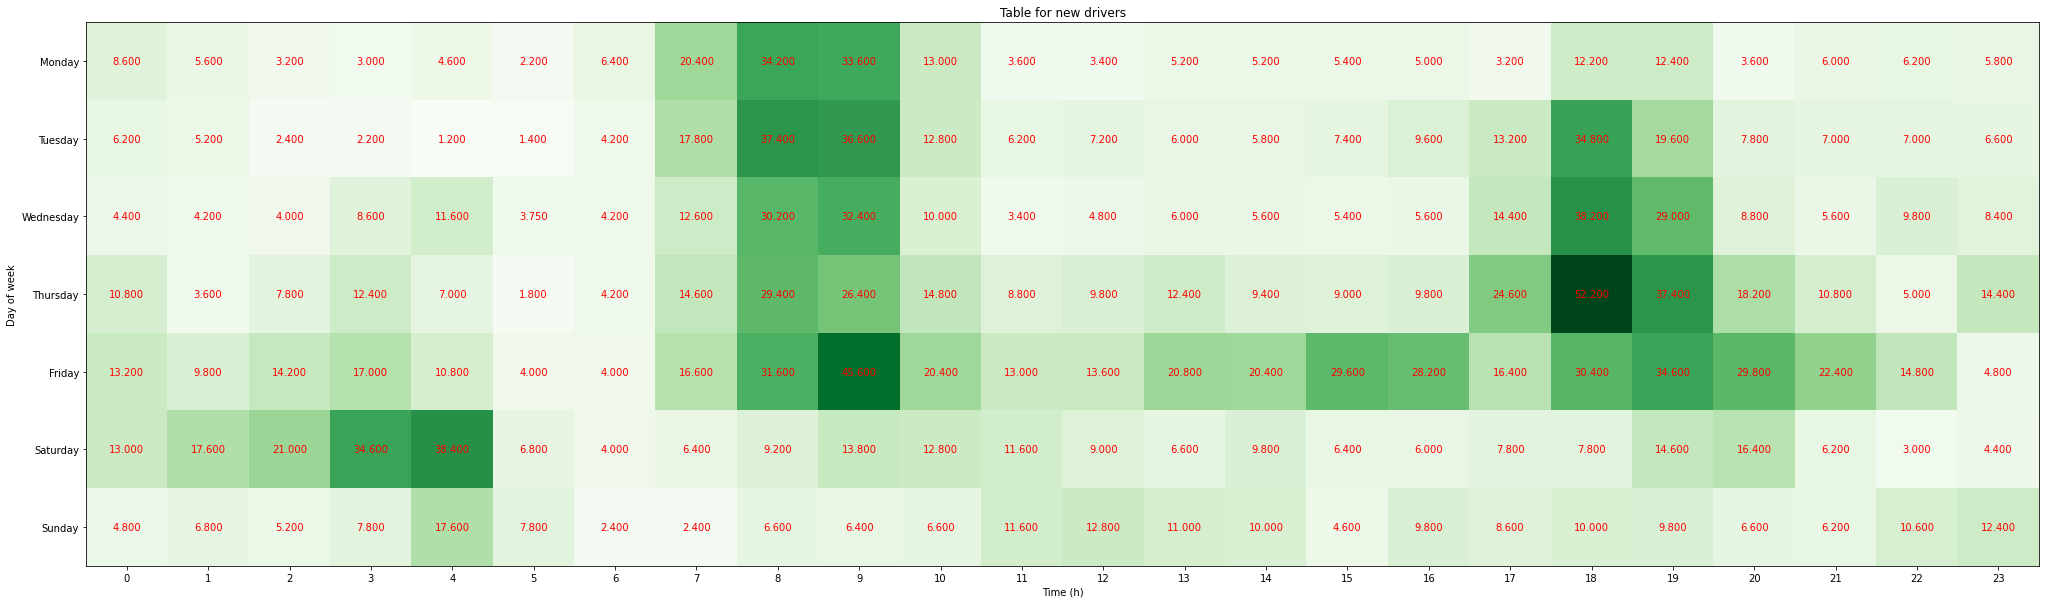

In [449]:
import numpy as np

fig, ax = plt.subplots()
fig.set_figwidth(35)
fig.set_figheight(10)
# generate some example data
#matrix = np.random.uniform(0,1,(24,7))

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
#ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_yticks(np.arange(len(days)))
ax.set_yticklabels(days)

# plot the matrix as an image with an appropriate colormap
plt.imshow(m1, aspect='auto', cmap="Greens")

# add the values
for (i, j), value in np.ndenumerate(m1.T):
    plt.text(i, j, "%.3f"%value, va='center', ha='center', c='red')
    
ax.set_xlabel('Time (h)')
ax.set_ylabel('Day of week')
ax.set_title('Table for new drivers')

plt.axis('on')
plt.show()

In [450]:
fig.savefig("table_absolute.png")

In [451]:
demand0

,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique),Share_0,Share_1
Date_,,,,,
0 00,8.6,24.4,75.8,0.260606,0.739394
0 01,5.6,12.4,69.2,0.311111,0.688889
0 02,3.2,7.4,69.6,0.301887,0.698113
0 03,3.0,3.2,56.6,0.483871,0.516129
0 04,4.6,2.6,35.4,0.638889,0.361111
...,...,...,...,...,...
6 19,9.8,52.6,86.0,0.157051,0.842949
6 20,6.6,49.0,88.6,0.118705,0.881295
6 21,6.2,39.4,87.6,0.135965,0.864035


# -----

In [452]:
active = active.sort_values(by=['Date_'], ascending=True)
active

,Users,Drivers,U/D
Date_,,,
0 00,8.6,40.0,0.215000
0 01,5.6,29.6,0.189189
0 02,3.2,20.4,0.156863
0 03,3.0,14.8,0.202703
0 04,4.6,12.4,0.370968
...,...,...,...
6 19,9.8,82.2,0.119221
6 20,6.6,82.0,0.080488
6 21,6.2,74.2,0.083558


In [453]:
Drivers_M = []
for i in range(7):
    temp = []
    Drivers_M.append(temp)
    for j in range(24):
        Drivers_M[i].append(active.iloc[i*24 + j, 2])
Drivers_M

[[0.215,
  0.18918918918918917,
  0.15686274509803924,
  0.2027027027027027,
  0.3709677419354838,
  0.14666666666666667,
  0.2882882882882883,
  0.5425531914893617,
  0.6653696498054475,
  0.5316455696202531,
  0.18571428571428572,
  0.05278592375366569,
  0.05059523809523809,
  0.08360128617363344,
  0.07975460122699386,
  0.07605633802816902,
  0.0639386189258312,
  0.03747072599531616,
  0.1473429951690821,
  0.12863070539419086,
  0.039473684210526314,
  0.07653061224489795,
  0.09657320872274143,
  0.11026615969581749],
 [0.1519607843137255,
  0.17218543046357618,
  0.11428571428571428,
  0.11578947368421054,
  0.06382978723404255,
  0.07692307692307693,
  0.15328467153284672,
  0.42180094786729855,
  0.6824817518248175,
  0.5289017341040463,
  0.16710182767624024,
  0.08563535911602209,
  0.10557184750733138,
  0.09090909090909091,
  0.08923076923076922,
  0.10601719197707737,
  0.12435233160621761,
  0.14864864864864866,
  0.381578947368421,
  0.19405940594059407,
  0.076923076

In [454]:
m2 = np.matrix(Drivers_M)
m2

matrix([[0.215     , 0.18918919, 0.15686275, 0.2027027 , 0.37096774,
         0.14666667, 0.28828829, 0.54255319, 0.66536965, 0.53164557,
         0.18571429, 0.05278592, 0.05059524, 0.08360129, 0.0797546 ,
         0.07605634, 0.06393862, 0.03747073, 0.147343  , 0.12863071,
         0.03947368, 0.07653061, 0.09657321, 0.11026616],
        [0.15196078, 0.17218543, 0.11428571, 0.11578947, 0.06382979,
         0.07692308, 0.15328467, 0.42180095, 0.68248175, 0.52890173,
         0.16710183, 0.08563536, 0.10557185, 0.09090909, 0.08923077,
         0.10601719, 0.12435233, 0.14864865, 0.38157895, 0.19405941,
         0.07692308, 0.07625272, 0.08454106, 0.09705882],
        [0.08118081, 0.0941704 , 0.125     , 0.35245902, 0.50434783,
         0.14880952, 0.14285714, 0.28899083, 0.50166113, 0.45125348,
         0.11655012, 0.04260652, 0.06629834, 0.08108108, 0.07427056,
         0.06870229, 0.06407323, 0.15652174, 0.43908046, 0.30526316,
         0.08888889, 0.05870021, 0.11529412, 0.11260054]

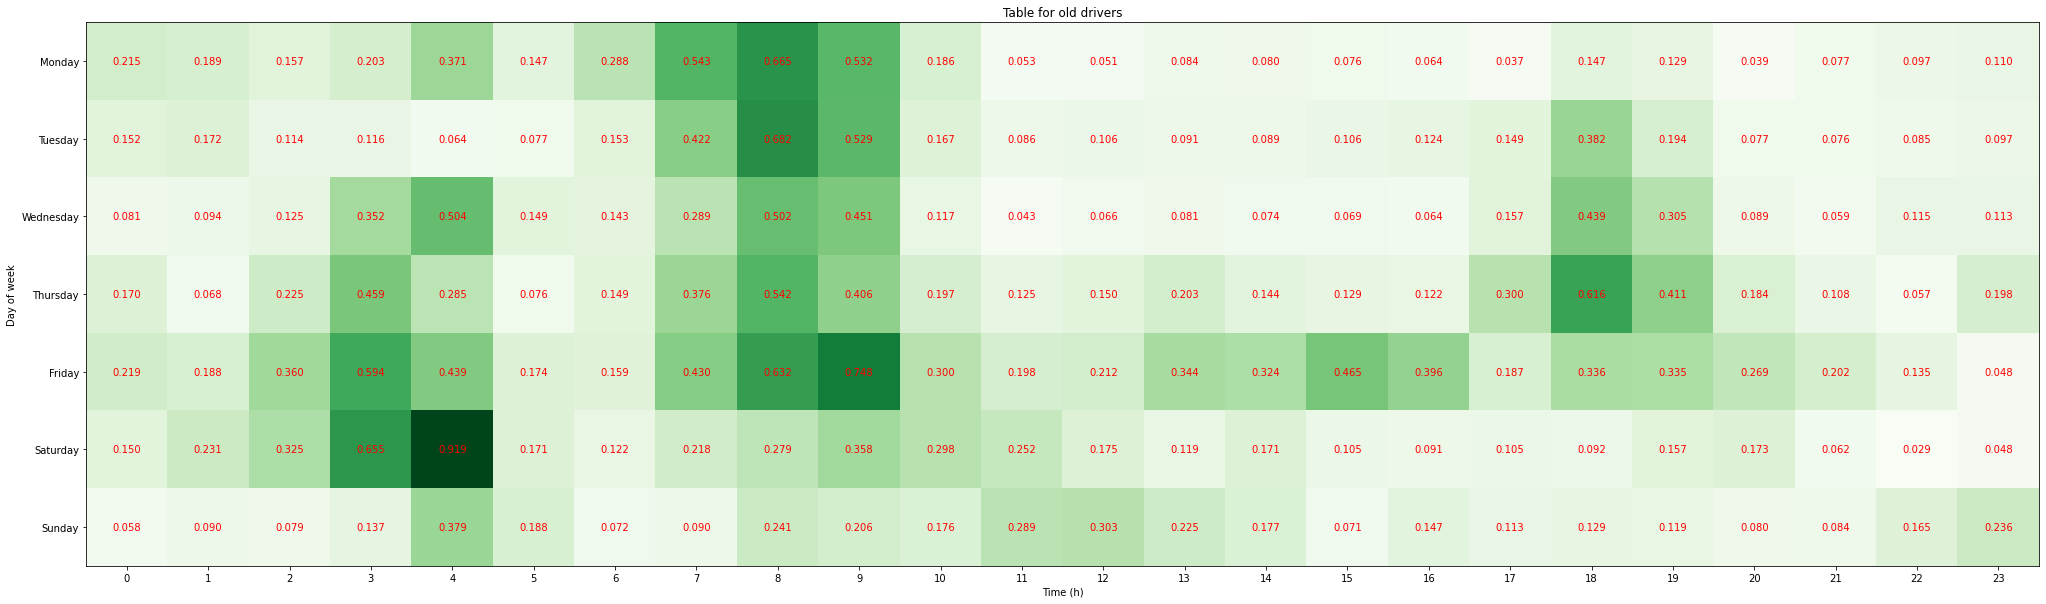

In [455]:
import numpy as np

fig, ax = plt.subplots()
fig.set_figwidth(35)
fig.set_figheight(10)
# generate some example data
#matrix = np.random.uniform(0,1,(24,7))

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
#ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_yticks(np.arange(len(days)))
ax.set_yticklabels(days)

# plot the matrix as an image with an appropriate colormap
plt.imshow(m2, aspect='auto', cmap="Greens")

ax.set_xlabel('Time (h)')
ax.set_ylabel('Day of week')
ax.set_title('Table for old drivers')

# add the values
for (i, j), value in np.ndenumerate(m2.T):
    plt.text(i, j, "%.3f"%value, va='center', ha='center', c='red')
plt.axis('on')
plt.show()

In [456]:
fig.savefig("table_relative.png")

In [457]:
active

,Users,Drivers,U/D
Date_,,,
0 00,8.6,40.0,0.215000
0 01,5.6,29.6,0.189189
0 02,3.2,20.4,0.156863
0 03,3.0,14.8,0.202703
0 04,4.6,12.4,0.370968
...,...,...,...
6 19,9.8,82.2,0.119221
6 20,6.6,82.0,0.080488
6 21,6.2,74.2,0.083558
